1. Can we use Bagging for regression problems?

Yes! Bagging works for both classification and regression.
In regression, Bagging simply averages the predictions of many models to make the final output smoother and more stable.

2. Difference between multiple-model training and single-model training

Single model: You train only one model. If it makes a mistake, that mistake directly affects the result.

Multiple models (Ensemble): You train many models and combine their results. This reduces errors because models correct each other.

3. Feature randomness in Random Forest

Random Forest does not allow every tree to look at all features.
Instead, at each split, it randomly selects a few features.
This randomness makes trees different from each other → improving accuracy and reducing overfitting.

4. What is OOB (Out-of-Bag) Score?

In Bagging/Random Forest, each tree is trained on a bootstrap sample.
Some samples are left out — these are called out-of-bag samples.
Trees test these OOB samples, and the accuracy from them is called the OOB score.

5. How to measure feature importance in Random Forest?

Two common ways:

Gini Importance / Impurity Decrease

Permutation Importance – measure drop in accuracy when a feature is shuffled.

6. Working principle of Bagging Classifier

Take multiple bootstrap samples

Train multiple models (usually decision trees)

Combine predictions by majority vote
Result → Stable and less overfit model.

7. How to evaluate a Bagging Classifier?

Use metrics like:

Accuracy

Confusion matrix

Precision / Recall / F1

OOB score (if enabled)

8. How does a Bagging Regressor work?

Same as Bagging Classifier, but instead of voting, it averages predictions from all models.

9. Main advantage of ensemble techniques

They reduce overfitting and increase accuracy by combining many weak learners.

10. Main challenge of ensemble techniques

They are computationally heavy and harder to interpret.

11. Key idea behind ensemble techniques

Many weak models together can behave like one strong model.

12. What is a Random Forest Classifier?

It is a collection of decision trees where each tree sees random features and random samples.

13. Main types of ensemble techniques

Bagging

Boosting

Stacking

Voting

14. What is ensemble learning?

Using multiple models together to make a more accurate final model.

15. When should we avoid using ensemble?

When the dataset is very small

When interpretability is required

When computation power is low

16. How does Bagging reduce overfitting?

It averages many models → cancels out noise → reduces variance → less overfitting.

17. Why is Random Forest better than a single Decision Tree?

A decision tree overfits easily.
Random Forest uses many trees → gives stable, generalizable results.

18. Role of bootstrap sampling in Bagging

Bootstrap = sampling with replacement.
It makes each model see slightly different data → creating diversity → better ensemble performance.

19. Real-world applications of ensemble techniques

Fraud detection

Spam detection

Loan approval

Medical diagnosis

Recommendation systems

In [32]:
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
#21
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    bootstrap=True,
    random_state=42
)

bag_clf.fit(X_train, y_train)
pred = bag_clf.predict(X_test)

print("Bagging Classifier Accuracy:", accuracy_score(y_test, pred))

Bagging Classifier Accuracy: 0.956140350877193


In [5]:
#22

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bag_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

bag_reg.fit(X_train, y_train)
pred = bag_reg.predict(X_test)

print("Bagging Regressor MSE:", mean_squared_error(y_test, pred))

Bagging Regressor MSE: 3056.494602247191


In [6]:
#23
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
for name, score in zip(load_breast_cancer().feature_names, importances):
    print(name, "=>", score)


mean radius => 0.11072803207784121
mean texture => 0.028056357004813726
mean perimeter => 0.12171414019733737
mean area => 0.11343862264045797
mean smoothness => 0.11096979399092184
mean compactness => 0.11096654501220746
mean concavity => 0.1080805546694523
mean concave points => 0.06194322570507384
mean symmetry => 0.11914132604846156
mean fractal dimension => 0.1149614026534328


In [7]:
#24
tree = DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

tree.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

tree_pred = tree.predict(X_test)
rf_pred = rf_reg.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, tree_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))


Decision Tree MSE: 5048.011235955056
Random Forest MSE: 2952.0105887640448


In [18]:
#25
rf_oob = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=42
)

rf_oob.fit(X_train, y_train)
print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.9560439560439561


In [10]:
#26
bag_svm = BaggingClassifier(
    estimator=SVC(),
    n_estimators=15,
    random_state=42
)

bag_svm.fit(X_train, y_train)
print("Bagging SVM Accuracy:", bag_svm.score(X_test, y_test))

Bagging SVM Accuracy: 0.0


In [11]:
#27
for n in [10, 50, 100, 200]:
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_temp.fit(X_train, y_train)
    print(f"Trees={n} → Accuracy={rf_temp.score(X_test, y_test)}")


Trees=10 → Accuracy=0.0
Trees=50 → Accuracy=0.0
Trees=100 → Accuracy=0.0
Trees=200 → Accuracy=0.0


In [14]:
#28
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bag_log = BaggingClassifier(
    estimator=LogisticRegression(max_iter=2000),
    n_estimators=20,
    random_state=42
)

bag_log.fit(X_train, y_train)
probs = bag_log.predict_proba(X_test)[:, 1]
print("AUC Score:", roc_auc_score(y_test, probs))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC Score: 0.99737962659679


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#29
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

print("Feature Importances:")
print(rf_reg.feature_importances_)


Feature Importances:
[0.00140464 0.02106669 0.00253679 0.00514265 0.00665222 0.00077436
 0.00465622 0.20278063 0.00266848 0.00214951 0.00369567 0.00376398
 0.00391315 0.01023858 0.00347514 0.00170722 0.00658655 0.00326183
 0.00354071 0.00527785 0.10347025 0.0254747  0.15894716 0.11817087
 0.00845557 0.00183561 0.01177066 0.26993618 0.00421464 0.0024315 ]


In [19]:
#30
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50)
rf = RandomForestClassifier(n_estimators=50)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Bagging Accuracy:", bag.score(X_test, y_test))
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Bagging Accuracy: 0.9649122807017544
Random Forest Accuracy: 0.9649122807017544


In [20]:
#31
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.9582026257697223


In [22]:
#32
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in [10, 30, 50, 100]:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = ((y_test - pred) ** 2).mean()
    print(f"Estimators = {n} → MSE = {mse}")

Estimators = 10 → MSE = 3256.961797752809
Estimators = 30 → MSE = 3101.109188514357
Estimators = 50 → MSE = 3056.494602247191
Estimators = 100 → MSE = 2970.863235955056


In [23]:
#33
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

mis_idx = np.where(pred != y_test)[0]
print("Total Misclassified Samples:", len(mis_idx))
print("Indexes:", mis_idx[:10])  # print first 10 only


Total Misclassified Samples: 89
Indexes: [0 1 2 3 4 5 6 7 8 9]


In [30]:
#34
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier()
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

tree.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Single Tree Accuracy:", tree.score(X_test, y_test))
print("Bagging Accuracy:", bag.score(X_test, y_test))

Single Tree Accuracy: 0.9298245614035088
Bagging Accuracy: 0.956140350877193


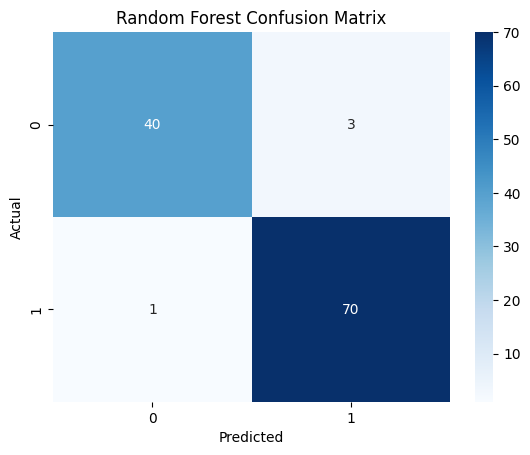

In [28]:
#35
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [33]:
#36
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=2000)
)

stack.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", stack.score(X_test, y_test))


Stacking Classifier Accuracy: 0.956140350877193


In [35]:
#37
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
top_idx = np.argsort(importances)[::-1][:5]

print("Top 5 Important Features:")
for i in top_idx:
    print(load_breast_cancer().feature_names[i], "→", importances[i])


Top 5 Important Features:
worst area → 0.15389236463205394
worst concave points → 0.14466326620735528
mean concave points → 0.10620998844591638
worst radius → 0.07798687515738047
mean concavity → 0.06800084191430111


In [37]:
#38
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

bag.fit(X_train, y_train)
pred = bag.predict(X_test)

prec, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average="binary")
print("Precision:", prec)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-Score: 0.965034965034965


In [38]:
#39
for depth in [None, 3, 5, 7, 10]:
    rf_temp = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_temp.fit(X_train, y_train)
    print(f"max_depth={depth} → Accuracy={rf_temp.score(X_test, y_test)}")


max_depth=None → Accuracy=0.9649122807017544
max_depth=3 → Accuracy=0.9649122807017544
max_depth=5 → Accuracy=0.9649122807017544
max_depth=7 → Accuracy=0.9649122807017544
max_depth=10 → Accuracy=0.9649122807017544


In [40]:
#40
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor()
}

for name, base in models.items():
    bag = BaggingRegressor(estimator=base, n_estimators=30, random_state=42)
    bag.fit(X_train, y_train)
    pred = bag.predict(X_test)
    print(name, "→ MSE:", mean_squared_error(y_test, pred))

Decision Tree → MSE: 0.03663742690058479
KNN → MSE: 0.027943859649122802


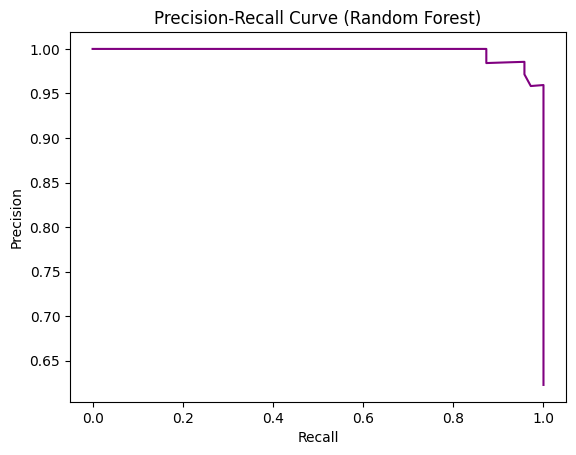

In [41]:
#43
from sklearn.metrics import precision_recall_curve

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

probs = rf.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, probs)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.show()


In [42]:
#44
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=2000)
)

stack.fit(X_train, y_train)
print("Stacking Accuracy:", stack.score(X_test, y_test))


Stacking Accuracy: 0.9649122807017544


In [44]:
#45
for size in [0.5, 0.7, 1.0]:
    bag = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=size,
        bootstrap=True,
        random_state=42
    )

    bag.fit(X_train, y_train)
    pred = bag.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"Bootstrap Sample = {size} \u2192 MSE = {mse}")

Bootstrap Sample = 0.5 → MSE = 0.033494736842105265
Bootstrap Sample = 0.7 → MSE = 0.0322
Bootstrap Sample = 1.0 → MSE = 0.03357543859649123
